# Installing and importing dependencies

In [1]:
pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from mistralai import Mistral

To get your secret MIstral API key, you just need to create an account in MIstral website and generate a new key. IT'S TOTALLY FREE !

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
mistral_api = user_secrets.get_secret("mistral-api")


Let's initiate a client variable to call the Mistral API

In [4]:
client = Mistral(api_key=mistral_api)

With the previous client initiated, we can call any Mistral AI model available in "La Platforme"

# Misral Large: The *🥐* LLm model

In [5]:
%%time

msg2llm = "What are the best Algerian Football teams?"



chat_response = client.chat.complete(
    model = "mistral-large-latest",
    messages = [
        {
            "role": "user",
            "content": msg2llm,
        },
    ]
)

print(chat_response.choices[0].message.content)

Algeria has a rich footballing history, and several teams have established themselves as major forces in both domestic and international competitions. Here are some of the best Algerian football teams:

1. **USM Alger (Union Sportive de la Médina d'Alger)**: USM Alger is one of the most successful clubs in Algerian football, with numerous league titles and cup wins. They have also had notable successes in African competitions.

2. **ES Sétif (Entente Sportive Sétifienne)**: ES Sétif has a strong track record, including multiple Algerian Ligue Professionnelle 1 titles and successes in African competitions, such as winning the CAF Champions League.

3. **JS Kabylie (Jeunesse Sportive de Kabylie)**: JS Kabylie is one of the most decorated clubs in Algerian football, with a long list of domestic league and cup titles. They have also won the African Cup Winners' Cup and the African Champions League.

4. **CR Belouizdad (Chabab Riadhi Belouizdad)**: CR Belouizdad has a rich history and is kn

# Pixtral: Vision LLM

Benchmarks According to Mistral.

Please Keep in mind that many testers in the internet pointed out that those results may not be super accurate

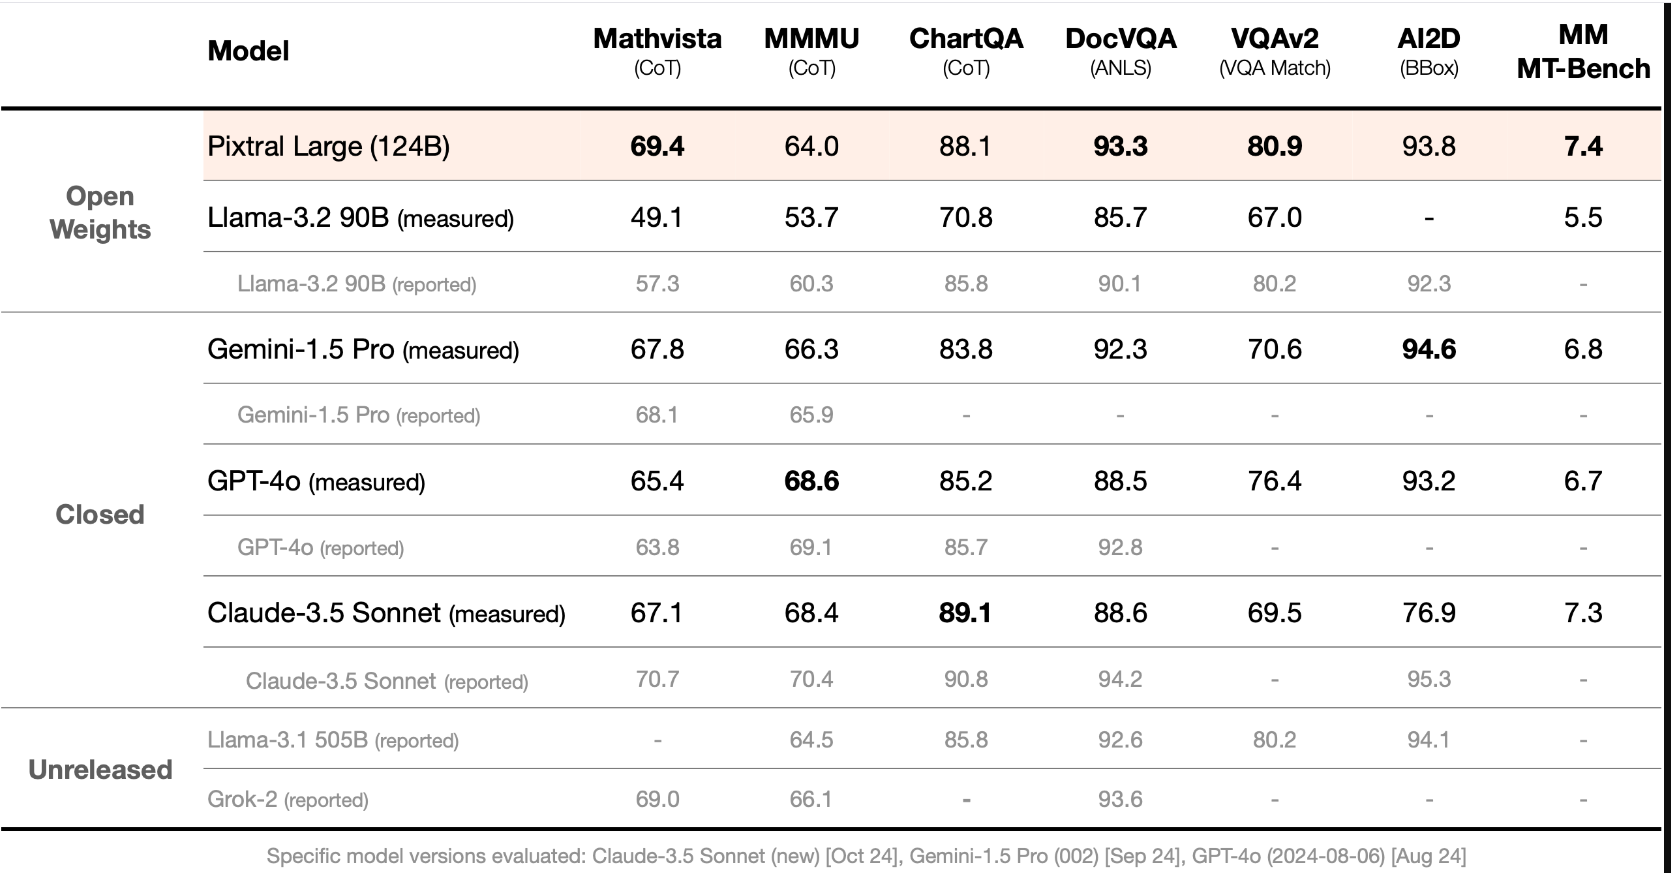

Let's ask Mistral about the previous image!

In [6]:
model = 'pixtral-large-latest'
img_url = 'https://mistral.ai/images/news/pixtral-large/pixtral-large-main-table.png'
chat_response = client.chat.complete( model=model, messages = [{"role": "user","content": [{"type": "text","text": "According to the chart, how does Pixtral 12B performs compared to other models?"},{"type": "image_url","image_url": img_url}]},])
print(chat_response.choices[0].message.content)

To analyze the performance of Pixtral Large (124B), we need to compare its scores in various benchmarks against other models listed in the chart. Here's a step-by-step analysis:

1. **Mathvista (CoT)**:
   - Pixtral Large (124B): 69.4
   - Llama-3.2 90B (measured): 49.1
   - Llama-3.2 90B (reported): 57.3
   - Gemini-1.5 Pro (measured): 67.8
   - Gemini-1.5 Pro (reported): 68.1
   - GPT-4o (measured): 65.4
   - GPT-4o (reported): 63.8
   - Claude-3.5 Sonnet (measured): 67.1
   - Claude-3.5 Sonnet (reported): 70.7
   - Llama-3.1 505B (reported): Not available
   - Grok-2 (reported): 69.0

   **Comparison**: Pixtral Large (124B) scores the highest at 69.4, outperforming all other models.

2. **MMMU (CoT)**:
   - Pixtral Large (124B): 64.0
   - Llama-3.2 90B (measured): 53.7
   - Llama-3.2 90B (reported): 60.3
   - Gemini-1.5 Pro (measured): 66.3
   - Gemini-1.5 Pro (reported): 65.9
   - GPT-4o (measured): 68.6
   - GPT-4o (reported): 69.1
   - Claude-3.5 Sonnet (measured): 68.4
   - Clau

Amazing! Seems that we don't need OCR anymore !

In [7]:
def chat_vision(img_url, user_msg = "Describe the image"):
    model='pixtral-large-latest'
    chat_response = client.chat.complete( model=model, messages = [{"role": "user","content": [{"type": "text","text": user_msg},{"type": "image_url","image_url": img_url}]},])
    return chat_response.choices[0].message.content

In [8]:
res1 = chat_vision('https://mistral.ai/images/news/pixtral-large/pixtral-large-main-table.png')
print(res1)

The image is a table summarizing the performance of various language models across multiple benchmarks. The table is divided into three categories: Open Weights, Closed, and Unreleased, based on the availability of the models. 

Here's a detailed breakdown of the table:

### Categories and Models:
1. **Open Weights:**
   - **Pixtral Large (124B)**
   - **Llama-3.2 90B (measured)**
   - **Llama-3.2 90B (reported)**
   - **Gemini-1.5 Pro (measured)**
   - **Gemini-1.5 Pro (reported)**

2. **Closed:**
   - **GPT-4o (measured)**
   - **GPT-4o (reported)**

3. **Unreleased:**
   - **Claude-3.5 Sonnet (measured)**
   - **Claude-3.5 Sonnet (reported)**
   - **Llama-3.1 505B (reported)**
   - **Grok-2 (reported)**

### Benchmarks and Scores:
The table evaluates each model across several benchmarks with different metrics:
- **Mathvista (CoT)**
- **MMMU (CoT)**
- **ChartQA (CoT)**
- **DocVQA (ANLS)**
- **VQAv2 (VQA Match)**
- **AI2D (BBox)**
- **MM MT-Bench**

The scores for each model are prese

In [9]:
%%time
msg = "According to the chart, how does Pixtral 12B performs compared to other models?"
res2 = chat_vision('https://mistral.ai/images/news/pixtral-large/pixtral-large-main-table.png', msg)
print(res2)

To evaluate Pixtral Large (124B)'s performance, we need to compare its scores across all the different benchmarks with those of the other models in the chart. Let's analyze Pixtral Large (124B) in each category:

1. **Mathvista (CoT)**:
   - Pixtral Large (124B): 69.4
   - Highest among measured models: Claude-3.5 Sonnet (reported): 70.7
   - Highest among reported models: Claude-3.5 Sonnet (reported): 70.7

2. **MMMU (CoT)**:
   - Pixtral Large (124B): 64.0
   - Highest among measured models: Claude-3.5 Sonnet (measured): 68.4
   - Highest among reported models: Claude-3.5 Sonnet (reported): 70.4

3. **ChartQA (CoT)**:
   - Pixtral Large (124B): 88.1
   - Highest among measured models: Claude-3.5 Sonnet (measured): 89.1
   - Highest among reported models: Claude-3.5 Sonnet (reported): 90.8

4. **DocVQA (ANLS)**:
   - Pixtral Large (124B): 93.3
   - Highest among measured models: Claude-3.5 Sonnet (measured): 88.6
   - Highest among reported models: Claude-3.5 Sonnet (reported): 94.2

